In [1]:
from scipy.io import arff
import pandas as pd
from GAN import GAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = arff.loadarff('Assignment 4 files/diabetes.arff')
df = pd.DataFrame(data[0])
to_norm = df.columns.values[:-1]

df['class'] = df['class'].apply(lambda x: x.decode("utf-8"))
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes

for column in to_norm:
    df[column] = (df[column] - df[column].min()) /(df[column].max() - df[column].min())
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [2]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model_diabetes'

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

9
0 [D loss: 0.691588, acc.: 53.12%] [G loss: 0.688078]
generated_data
100 [D loss: 0.617010, acc.: 82.81%] [G loss: 0.835019]
generated_data
200 [D loss: 0.681725, acc.: 59.38%] [G loss: 0.772884]
generated_data
300 [D loss: 0.679640, acc.: 53.12%] [G loss: 0.718321]
generated_data
400 [D loss: 0.713378, acc.: 31.25%] [G loss: 0.707983]
generated_data
500 [D loss: 0.686231, acc.: 57.81%] [G loss: 0.703805]
generated_data
600 [D loss: 0.688465, acc.: 62.50%] [G loss: 0.703588]
generated_data
700 [D loss: 0.694677, acc.: 39.06%] [G loss: 0.710008]
generated_data
800 [D loss: 0.685155, acc.: 59.38%] [G loss: 0.724104]
generated_data
900 [D loss: 0.697211, acc.: 48.44%] [G loss: 0.716573]
generated_data
1000 [D loss: 0.693460, acc.: 46.88%] [G loss: 0.718351]
generated_data
1100 [D loss: 0.695527, acc.: 48.44%] [G loss: 0.704588]
generated_data
1200 [D loss: 0.687005, acc.: 56.25%] [G loss: 0.703397]
generated_data
1300 [D loss: 0.692409, acc.: 51.56%] [G loss: 0.722810]
generated_data
14

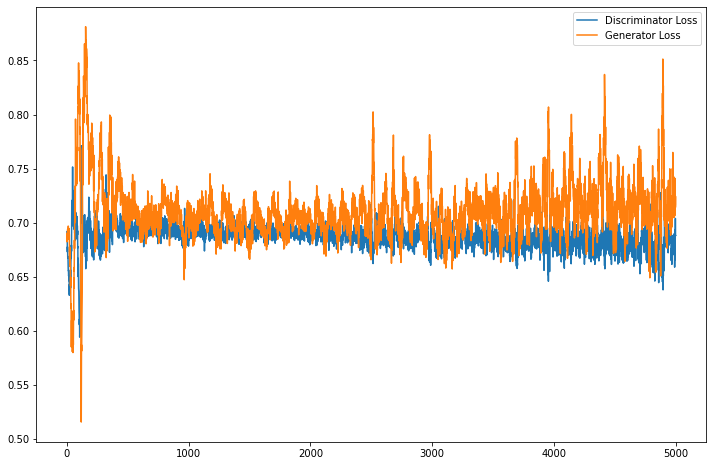

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history['D_loss'], label='Discriminator Loss')
ax.plot(history['G_loss'], label='Generator Loss')
plt.legend()
plt.show()

In [3]:
from sklearn.decomposition import PCA

In [4]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [5]:
X_embedded

array([[ 0.7069937 ,  0.15312978],
       [-0.40271091, -0.0881876 ],
       [ 0.68963127,  0.10496044],
       ...,
       [-0.34377156,  0.07261042],
       [ 0.62311372, -0.0179499 ],
       [-0.40738638, -0.17497506]])

In [6]:
len(df)

768

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 500 # number of fraud cases
noise_dim = 5

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [8]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

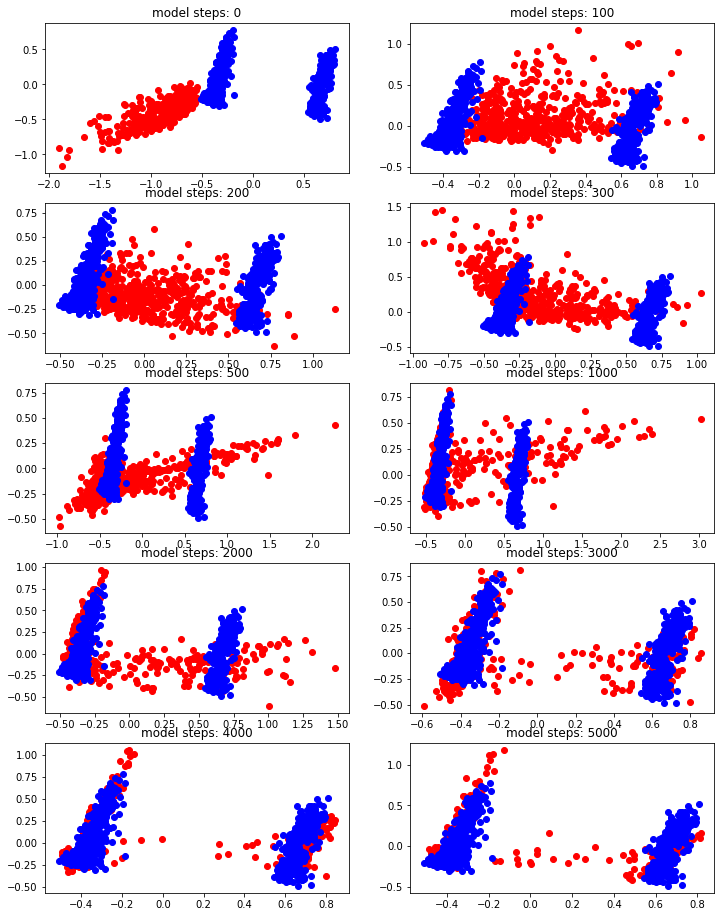

In [9]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

### German Credit

In [134]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
df = pd.DataFrame(data[0])
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [135]:
columns = df.columns

In [136]:
for column in columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode("utf-8"))
        df[column] = df[column].apply(lambda v: int(re.findall('[0-9]+', v)[0]))

In [137]:
import re

In [138]:
for column in columns:
    if df[column].dtype != object:
        df[column] = (df[column] - df[column].min()) /(df[column].max() - df[column].min())
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.000000,0.029412,1.00,0.008108,0.050567,1.00,1.00,1.000000,0.666667,0.0,...,0.000000,0.857143,1.0,0.5,0.333333,0.666667,0.0,1.0,0.0,0.0
1,0.333333,0.647059,0.50,0.008108,0.313690,0.00,0.50,0.333333,0.333333,0.0,...,0.000000,0.053571,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,1.0
2,1.000000,0.117647,1.00,0.016216,0.101574,0.00,0.75,0.333333,0.666667,0.0,...,0.000000,0.535714,1.0,0.5,0.000000,0.333333,1.0,0.0,0.0,0.0
3,0.000000,0.558824,0.50,0.005405,0.419941,0.00,0.75,0.333333,0.666667,1.0,...,0.333333,0.464286,1.0,1.0,0.000000,0.666667,1.0,0.0,0.0,0.0
4,0.000000,0.294118,0.75,0.000000,0.254209,0.00,0.50,0.666667,0.666667,0.0,...,1.000000,0.607143,1.0,1.0,0.333333,0.666667,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.50,0.005405,0.081765,0.00,0.75,0.666667,0.333333,0.0,...,0.000000,0.214286,1.0,0.5,0.000000,0.333333,0.0,0.0,0.0,0.0
996,0.000000,0.382353,0.50,0.002703,0.198470,0.00,0.50,1.000000,0.000000,0.0,...,0.333333,0.375000,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0.0
997,1.000000,0.117647,0.50,0.008108,0.030483,0.00,1.00,1.000000,0.666667,0.0,...,0.666667,0.339286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0.0
998,0.000000,0.602941,0.50,0.008108,0.087763,0.00,0.50,1.000000,0.666667,0.0,...,1.000000,0.071429,1.0,1.0,0.000000,0.666667,0.0,1.0,0.0,1.0


In [139]:
#Define the GAN and training parameters
noise_dim = 10
dim = 21
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir= 'model_credit'

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = [models_dir, epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(df, train_args)

0 [D loss: 0.665919, acc.: 50.00%] [G loss: 0.643199]
generated_data
100 [D loss: 0.683486, acc.: 51.56%] [G loss: 0.772632]
generated_data
200 [D loss: 0.686139, acc.: 48.44%] [G loss: 0.687952]
generated_data
300 [D loss: 0.676684, acc.: 64.06%] [G loss: 0.773666]
generated_data
400 [D loss: 0.630378, acc.: 60.94%] [G loss: 0.683779]
generated_data
500 [D loss: 0.687637, acc.: 56.25%] [G loss: 0.672748]
generated_data
600 [D loss: 0.659634, acc.: 57.81%] [G loss: 0.712080]
generated_data
700 [D loss: 0.658646, acc.: 64.06%] [G loss: 0.844059]
generated_data
800 [D loss: 0.655995, acc.: 68.75%] [G loss: 0.823366]
generated_data
900 [D loss: 0.693830, acc.: 51.56%] [G loss: 0.891893]
generated_data
1000 [D loss: 0.681574, acc.: 56.25%] [G loss: 0.652903]
generated_data
1100 [D loss: 0.705440, acc.: 51.56%] [G loss: 0.646795]
generated_data
1200 [D loss: 0.673307, acc.: 54.69%] [G loss: 0.918637]
generated_data
1300 [D loss: 0.646387, acc.: 70.31%] [G loss: 0.796265]
generated_data
1400

In [140]:
from sklearn.decomposition import PCA

In [141]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [142]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 500 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [143]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

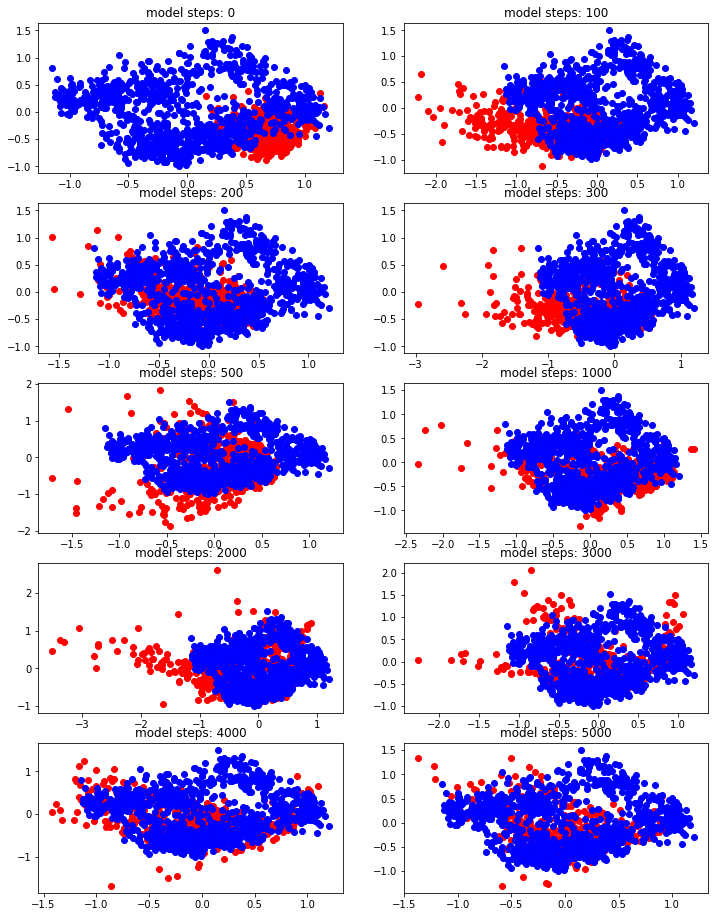

In [144]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + 'model_credit_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [145]:
import re

In [173]:
s = 'he error1 '
print(bool(re.search('error1', s)))

True


### PART 2

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.30, random_state=42)
print(f'train shape: {X_train.shape}')
print(f'test shape: {X_test.shape}')

train shape: (537, 8)
test shape: (231, 8)


In [16]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [18]:
clf.predict_proba(X_test)

array([[-0.55435923, -0.85434986],
       [-0.23576534, -1.56048599],
       [-0.18118983, -1.79743738],
       [-0.32946921, -1.27048815],
       [-0.64384976, -0.74500143],
       [-0.62785288, -0.76300451],
       [-0.07893823, -2.57829918],
       [-0.52765319, -0.8915687 ],
       [-0.77400788, -0.6183386 ],
       [-0.76188333, -0.62883335],
       [-0.34819924, -1.22403337],
       [-1.24624926, -0.33908965],
       [-0.62314484, -0.7684212 ],
       [-0.4923248 , -0.94470002],
       [-0.10574915, -2.2990942 ],
       [-0.44937261, -1.0161893 ],
       [-0.2566512 , -1.48561983],
       [-0.18618975, -1.77263981],
       [-0.72934938, -0.65820992],
       [-0.4230166 , -1.06440728],
       [-0.32101929, -1.29247349],
       [-0.32309343, -1.28701467],
       [-0.57952349, -0.82135614],
       [-0.16771187, -1.86819206],
       [-0.78764411, -0.60681401],
       [-1.30435076, -0.31655992],
       [-0.15708058, -1.92850875],
       [-0.11937762, -2.18455866],
       [-0.34353847,

In [32]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

class Generator_RF():
    def __init__(self, batch_size):
        self.batch_size = batch_size

    def build_model(self, input_shape, dim, data_dim):
        input_Z = Input(shape=input_shape, batch_size=self.batch_size)
        input_C = Input(shape=1, batch_size=self.batch_size)
        x = Concatenate(axis=1)([input_Z, input_C])
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=[input_Z, input_C], outputs=x)

In [33]:
mdl = Generator_RF(32)

In [34]:
mdl.build_model(9, 10, 1)

In [37]:
class Discriminator_RF():
    def __init__(self, batch_size):
        self.batch_size = batch_size

    def build_model(self, input_shape, dim):
        input_sample = Input(shape=input_shape, batch_size=self.batch_size)
        input_Y = Input(shape=1, batch_size=self.batch_size)
        input_C = Input(shape=1, batch_size=self.batch_size)
        x = Concatenate(axis=1)([input_sample, input_sample_Y, input_C])
        x = Dense(dim * 4, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=[input_sample, input_sample_Y, input_C], outputs=x)

In [ ]:

class GAN_RF():

    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator_RF(self.batch_size). \
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator_RF(self.batch_size). \
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(record)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))

    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments

        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))
        history = {'D_loss': [],
                   'D_acc': [],
                   'G_loss': []}
        for epoch in range(epochs):
            # ---------------------
            #  Train Discriminator
            # ---------------------
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)
            
            if epoch % 100 == 0:
                # Plot the progress
                print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            history['D_loss'].append(d_loss[0])
            history['D_acc'].append(100 * d_loss[1])
            history['G_loss'].append(g_loss)
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                # Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                # Here is generating the data
                z = tf.random.normal((432, self.noise_dim))
                gen_data = self.generator(z)
                print('generated_data')
        return history

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return

    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator